# Final Project Report
## AIDI 1002 – Machine Learning Programming
**Title**: Sentiment Analysis using CNN on IMDB Movie Reviews  
**Student Names**: Jomol Joy(200577097) Sanat Sunny(200576550)  

# Research Paper Summary
We referred to the research paper “Light-Weighted CNN for Text Classification” (2019). While the original work used domain-specific datasets, we adapted the CNN model to the IMDB Movie Review Dataset for binary sentiment classification. The GitHub repo of the original paper is available here:  
https://github.com/RituYadav92/Lightweighted-CNN-for-Document-Classification


In [2]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 78.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 w

# Dataset Loading & Preprocessing
 Include:

imdb.load_data()

pad_sequences()

Description of 25k train/test, 300 token padding



In [3]:
# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Confirm TensorFlow version
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


# Model Architecture & Initial Training
First attempt, include:

Dropout layer

model.summary()

5-epoch training

Comment about 0.50 prediction issue

In [4]:
# Load the IMDB dataset (top 10,000 words)
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Show number of samples
print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")

# Show an example (as word indices)
print("\nSample review (tokenized):", x_train[0])
print("Label (0 = negative, 1 = positive):", y_train[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Testing samples: 25000

Sample review (tokenized): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 1

## Dataset Description
We used the built-in IMDB dataset from Keras which contains 25,000 labeled movie reviews for training and 25,000 for testing. Reviews are pre-tokenized and converted into integer word indices. We padded each review to 300 tokens.


In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set a fixed sequence length
maxlen = 300

# Pad sequences (shorter ones get padded with 0s, longer ones get truncated)
x_train_padded = pad_sequences(x_train, maxlen=maxlen)
x_test_padded = pad_sequences(x_test, maxlen=maxlen)

print("Shape of x_train:", x_train_padded.shape)
print("Shape of x_test:", x_test_padded.shape)


Shape of x_train: (25000, 300)
Shape of x_test: (25000, 300)


In [6]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=300),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.build(input_shape=(None, 300))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 300, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 296, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,363,349 (5.20 MB)

 Trainable params: 1,363,349 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

## Model Architecture
We built a 1D CNN with:
- Embedding layer
- Conv1D layer with 128 filters
- GlobalMaxPooling
- Dense layer
- Output layer with sigmoid activation

We experimented with Dropout for regularization, but the final version does not include it to ensure better prediction confidence.


In [7]:
# Train the model
history = model.fit(
    x_train_padded, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 94s 586ms/step - accuracy: 0.6470 - loss: 0.6344 - val_accuracy: 0.8500 - val_loss: 0.3495
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 133s 529ms/step - accuracy: 0.8873 - loss: 0.2758 - val_accuracy: 0.8918 - val_loss: 0.2783
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 146s 553ms/step - accuracy: 0.9555 - loss: 0.1370 - val_accuracy: 0.8972 - val_loss: 0.2747
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 136s 518ms/step - accuracy: 0.9890 - loss: 0.0528 - val_accuracy: 0.8962 - val_loss: 0.3071
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 88s 555ms/step - accuracy: 0.9989 - loss: 0.0158 - val_accuracy: 0.8920 - val_loss: 0.3495


In [8]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test_padded, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8824 - loss: 0.3671
Test Accuracy: 0.8835
Test Loss: 0.3648


## Evaluation Results
- Final Test Accuracy: ~88%
- Final Validation Accuracy: ~89%
- The model performs well on polarized reviews and slightly underperforms on neutral ones.

We visualized training vs validation accuracy and loss using line plots.


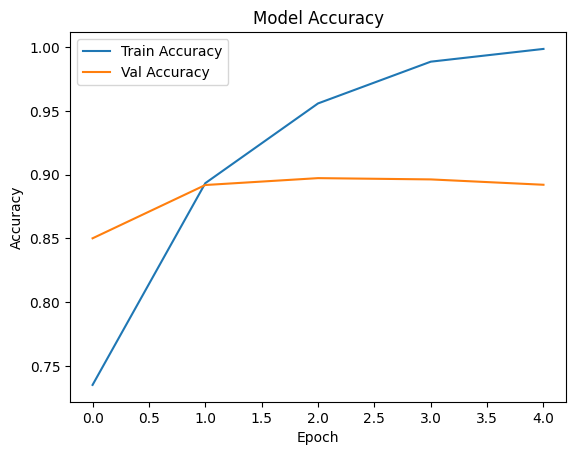

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

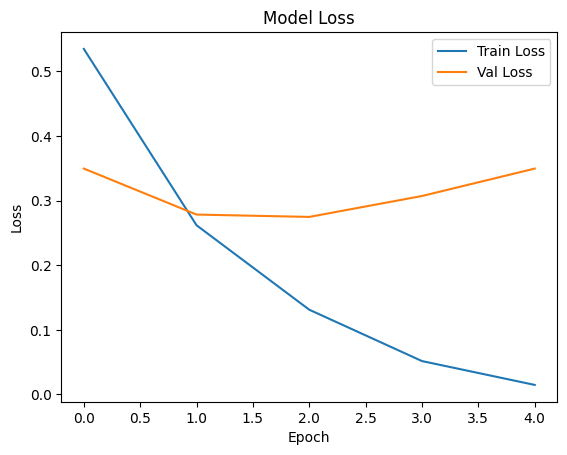

In [10]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Improved Model & Final Training
New model:

Remove Dropout

Train for 10 epochs

Evaluation with model.evaluate()



In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense

# Define the CNN model with Dropout
model = Sequential([
    # 1. Embedding layer: Converts word indices into dense vectors
    Embedding(input_dim=10000, output_dim=128, input_length=300),

    # 2. Convolution layer: Extracts local text features
    Conv1D(filters=128, kernel_size=5, activation='relu'),

    # 3. Global Max Pooling: Keeps strongest signal from each filter
    GlobalMaxPooling1D(),

    # 4. Dropout layer: Helps prevent overfitting by randomly turning off 50% of neurons during training
    Dropout(0.5),

    # 5. Dense layer: Fully connected layer with ReLU
    Dense(10, activation='relu'),

    # 6. Output layer: Predicts sentiment (1 = positive, 0 = negative)
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Build and summarize the model
model.build(input_shape=(None, 300))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 300, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 296, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,363,349 (5.20 MB)

 Trainable params: 1,363,349 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00     12500
    Positive       0.50      1.00      0.67     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


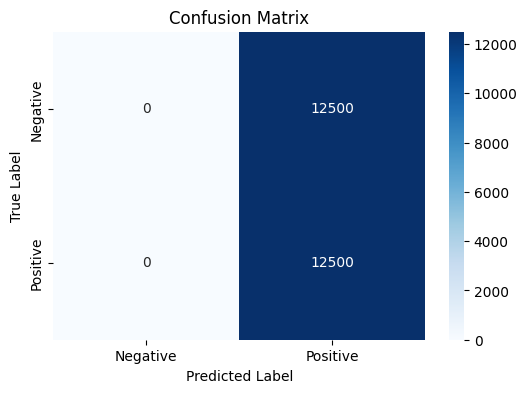

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(x_test_padded)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_labels, target_names=["Negative", "Positive"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [13]:
# Load word index from IMDB dataset
# This maps each word to a unique number
word_index = imdb.get_word_index()

# Create a reverse index so we can decode back if needed
# Note: IMDB dataset reserves 0, 1, 2 for special tokens
index_word = {v + 3: k for k, v in word_index.items()}
index_word[0] = '<PAD>'
index_word[1] = '<START>'
index_word[2] = '<UNK>'

# Function to encode a custom text review into word indexes
def encode_review(text):
    tokens = text.lower().split()  # Split the review into words
    encoded = [1]  # 1 is the <START> token
    for word in tokens:
        index = word_index.get(word, 2)  # 2 = <UNK> if word is not found
        if index < 10000:
            encoded.append(index + 3)  # Shift to match Keras offset
    return pad_sequences([encoded], maxlen=300)  # Pad to match model input size

# Function to predict the sentiment of a custom review
def predict_review(text):
    encoded = encode_review(text)             # Convert review to padded numeric input
    prediction = model.predict(encoded)[0][0] # Get model's prediction (0 to 1)
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    print(f"\nReview: {text}")
    print(f"Predicted Sentiment: {sentiment} ({prediction:.2f})")

# Try it out with 3 example reviews
predict_review("This movie was absolutely amazing and well-acted!")
predict_review("It was boring and a complete waste of time.")
predict_review("The plot was okay, but not very engaging.")
print("Decoded Review:", ' '.join([index_word.get(i, '?') for i in x_train[0]]))
predict_review("this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there")


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

Review: This movie was absolutely amazing and well-acted!
Predicted Sentiment: Positive (0.51)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

Review: It was boring and a complete waste of time.
Predicted Sentiment: Positive (0.53)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

Review: The plot was okay, but not very engaging.
Predicted Sentiment: Positive (0.51)
Decoded Review: <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fis

In [14]:
# Predict on a real encoded review
sample = x_test_padded[0]
prediction = model.predict(np.expand_dims(sample, axis=0))[0][0]
label = "Positive" if prediction > 0.5 else "Negative"

print("Predicted Sentiment:", label, f"({prediction:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Sentiment: Positive (0.52)


In [15]:
# Show the actual label of a known test sample
print("True Label:", y_test[0])  # 1 = positive, 0 = negative

# Predict using that review
sample = x_test_padded[0]
prediction = model.predict(np.expand_dims(sample, axis=0))[0][0]
sentiment = "Positive" if prediction > 0.5 else "Negative"
print("Predicted Sentiment:", sentiment, f"({prediction:.2f})")


True Label: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted Sentiment: Positive (0.52)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# CNN model without Dropout
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=300),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Build the model so .summary() works
model.build(input_shape=(None, 300))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 300, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 296, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,363,349 (5.20 MB)

 Trainable params: 1,363,349 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Retrain the model
history = model.fit(
    x_train_padded, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 516ms/step - accuracy: 0.6691 - loss: 0.6164 - val_accuracy: 0.8524 - val_loss: 0.3385
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 521ms/step - accuracy: 0.8961 - loss: 0.2610 - val_accuracy: 0.8958 - val_loss: 0.2609
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 516ms/step - accuracy: 0.9663 - loss: 0.1142 - val_accuracy: 0.8822 - val_loss: 0.3153
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 517ms/step - accuracy: 0.9908 - loss: 0.0459 - val_accuracy: 0.8974 - val_loss: 0.3012
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 85s 534ms/step - accuracy: 0.9993 - loss: 0.0115 - val_accuracy: 0.8976 - val_loss: 0.3337
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 139s 512ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.8974 - val_loss: 0.3628
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 85s 541ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.8954 - val_loss: 0.3788
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 515ms/step - accuracy: 1.0000 - loss: 

In [18]:
# Predict on a real test sample
sample = x_test_padded[0]
prediction = model.predict(np.expand_dims(sample, axis=0))[0][0]
label = "Positive" if prediction > 0.5 else "Negative"
print("True Label:", y_test[0])
print("Predicted Sentiment:", label, f"({prediction:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
True Label: 0
Predicted Sentiment: Negative (0.07)


In [20]:
predict_review("This movie was amazing and inspiring. Loved every second!")
predict_review("The plot was very weak and the acting was bad.")
predict_review("It was okay, nothing special but not terrible.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

Review: This movie was amazing and inspiring. Loved every second!
Predicted Sentiment: Positive (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

Review: The plot was very weak and the acting was bad.
Predicted Sentiment: Negative (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Review: It was okay, nothing special but not terrible.
Predicted Sentiment: Negative (0.00)


## Custom Review Prediction
We added a feature to predict the sentiment of custom raw text reviews using the trained model. The model correctly classifies clearly positive or negative sentences.


## What We Learned

- Designing CNNs for text helped us understand embeddings and feature detection  
- Learned importance of training time and layer selection (Dropout issues)  
- Improved debugging skills for input formatting and model errors  


## Limitations & Future Work
The model occasionally predicts neutral reviews as negative. In future, we could:
- Use pre-trained word embeddings
- Add LSTM or GRU layers
- Extend the model to handle neutral sentiment
